In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
try:
    import sklearn
    print(sklearn.__version__)
    if (sklearn.__version__ < '1.3.0'): #update for latest scikit-learn version
        !pip install -U --user scikit-learn
except Exception as e:
    !pip install scikit-learn

1.3.2


In [3]:
childcare = pd.read_csv("childcare_costs.csv")
childcare.head()

,county_fips_code,study_year,unr_16,funr_16,munr_16,unr_20to64,funr_20to64,munr_20to64,flfpr_20to64,flfpr_20to64_under6,...,memp_p,femp_p,mcsa,mfccsa,mc_infant,mc_toddler,mc_preschool,mfcc_infant,mfcc_toddler,mfcc_preschool
0,1001,2008,5.42,4.41,6.32,4.6,3.5,5.6,68.9,66.9,...,21.55,4.07,80.92,81.40,104.95,104.95,85.92,83.45,83.45,81.40
1,1001,2009,5.93,5.72,6.11,4.8,4.6,5.0,70.8,63.7,...,21.96,5.19,83.42,85.68,105.11,105.11,87.59,87.39,87.39,85.68
2,1001,2010,6.21,5.57,6.78,5.1,4.6,5.6,71.3,67.0,...,21.28,4.13,85.92,89.96,105.28,105.28,89.26,91.33,91.33,89.96
3,1001,2011,7.55,8.13,7.03,6.2,6.3,6.1,70.2,66.5,...,22.80,4.77,88.43,94.25,105.45,105.45,90.93,95.28,95.28,94.25
4,1001,2012,8.60,8.88,8.29,6.7,6.4,7.0,70.6,67.1,...,22.88,4.84,90.93,98.53,105.61,105.61,92.60,99.22,99.22,98.53


In [4]:
counties = pd.read_csv("counties.csv")
counties.head()

,county_fips_code,county_name,state_name,state_abbreviation
0,1001,Autauga County,Alabama,AL
1,1003,Baldwin County,Alabama,AL
2,1005,Barbour County,Alabama,AL
3,1007,Bibb County,Alabama,AL
4,1009,Blount County,Alabama,AL


In [5]:
df = childcare.merge(counties, how = 'left', on = "county_fips_code")
df.head()

,county_fips_code,study_year,unr_16,funr_16,munr_16,unr_20to64,funr_20to64,munr_20to64,flfpr_20to64,flfpr_20to64_under6,...,mfccsa,mc_infant,mc_toddler,mc_preschool,mfcc_infant,mfcc_toddler,mfcc_preschool,county_name,state_name,state_abbreviation
0,1001,2008,5.42,4.41,6.32,4.6,3.5,5.6,68.9,66.9,...,81.40,104.95,104.95,85.92,83.45,83.45,81.40,Autauga County,Alabama,AL
1,1001,2009,5.93,5.72,6.11,4.8,4.6,5.0,70.8,63.7,...,85.68,105.11,105.11,87.59,87.39,87.39,85.68,Autauga County,Alabama,AL
2,1001,2010,6.21,5.57,6.78,5.1,4.6,5.6,71.3,67.0,...,89.96,105.28,105.28,89.26,91.33,91.33,89.96,Autauga County,Alabama,AL
3,1001,2011,7.55,8.13,7.03,6.2,6.3,6.1,70.2,66.5,...,94.25,105.45,105.45,90.93,95.28,95.28,94.25,Autauga County,Alabama,AL
4,1001,2012,8.60,8.88,8.29,6.7,6.4,7.0,70.6,67.1,...,98.53,105.61,105.61,92.60,99.22,99.22,98.53,Autauga County,Alabama,AL


In [6]:
nc_childcare = df[df['state_name'] == "North Carolina"]
nc_childcare

,county_fips_code,study_year,unr_16,funr_16,munr_16,unr_20to64,funr_20to64,munr_20to64,flfpr_20to64,flfpr_20to64_under6,...,mfccsa,mc_infant,mc_toddler,mc_preschool,mfcc_infant,mfcc_toddler,mfcc_preschool,county_name,state_name,state_abbreviation
20789,37001,2008,5.71,5.32,6.07,5.2,4.9,5.5,77.0,73.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Alamance County,North Carolina,NC
20790,37001,2009,6.60,6.12,7.05,6.1,5.7,6.5,75.8,74.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Alamance County,North Carolina,NC
20791,37001,2010,8.35,7.42,9.24,7.9,6.9,8.9,75.7,76.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Alamance County,North Carolina,NC
20792,37001,2011,8.64,7.55,9.68,8.1,6.9,9.2,75.1,75.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Alamance County,North Carolina,NC
20793,37001,2012,9.38,8.41,10.33,8.7,7.7,9.6,74.5,76.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Alamance County,North Carolina,NC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21884,37199,2014,10.90,10.74,11.08,11.1,11.5,10.8,61.5,64.0,...,67.02,134.06,118.81,126.54,87.30,95.67,87.37,Yancey County,North Carolina,NC
21885,37199,2015,11.01,10.86,11.13,11.6,12.1,11.2,61.7,64.2,...,80.26,140.64,130.18,123.11,103.97,96.75,92.78,Yancey County,North Carolina,NC
21886,37199,2016,9.46,10.13,8.88,9.5,10.9,8.4,60.9,73.8,...,93.50,153.07,141.56,119.69,120.64,97.83,98.18,Yancey County,North Carolina,NC
21887,37199,2017,8.34,9.68,7.18,8.8,10.7,7.1,62.9,89.6,...,106.75,165.50,152.93,116.27,137.32,98.91,103.59,Yancey County,North Carolina,NC


**Research Question 1**
Exploratory Data Analysis
1. What is the distribution of the relationship between child's stage and costs of childcare in North Carolina in the years 2014-2018?

In [7]:
# Count the number of rows with at least one NaN
count_rows_with_nan = nc_childcare.isnull().any(axis=1).sum()
print("Number of rows with at least one NaN:", count_rows_with_nan)

Number of rows with at least one NaN: 608


In [8]:
selected_columns = ['study_year','mcsa', 'mfccsa', 'mc_infant', 'mc_toddler', 'mc_preschool', 'mfcc_infant', 'mfcc_toddler', 'mfcc_preschool', 'county_name', 'state_name', 'state_abbreviation']
rq1 = nc_childcare[selected_columns]
rq1 = rq1.dropna(how = 'any')
rq1

,study_year,mcsa,mfccsa,mc_infant,mc_toddler,mc_preschool,mfcc_infant,mfcc_toddler,mfcc_preschool,county_name,state_name,state_abbreviation
20795,2014,112.53,80.55,159.43,144.97,145.85,112.64,104.69,96.80,Alamance County,North Carolina,NC
20796,2015,108.50,94.16,160.65,148.71,140.63,121.98,113.51,108.85,Alamance County,North Carolina,NC
20797,2016,104.48,107.77,162.10,152.45,135.42,131.32,122.34,120.90,Alamance County,North Carolina,NC
20798,2017,100.46,121.38,163.54,156.19,130.21,140.65,131.16,132.94,Alamance County,North Carolina,NC
20799,2018,96.43,134.99,164.99,159.92,124.99,149.99,139.99,144.99,Alamance County,North Carolina,NC
...,...,...,...,...,...,...,...,...,...,...,...,...
21884,2014,97.63,67.02,134.06,118.81,126.54,87.30,95.67,87.37,Yancey County,North Carolina,NC
21885,2015,94.99,80.26,140.64,130.18,123.11,103.97,96.75,92.78,Yancey County,North Carolina,NC
21886,2016,92.35,93.50,153.07,141.56,119.69,120.64,97.83,98.18,Yancey County,North Carolina,NC
21887,2017,89.71,106.75,165.50,152.93,116.27,137.32,98.91,103.59,Yancey County,North Carolina,NC


In [9]:
# In NC, aggregated median price charge for Family Childcare in the year 2014-2018
rq1_family = rq1.groupby('study_year')[['mfcc_infant', 'mfcc_toddler', 'mfcc_preschool', 'mfccsa']].mean()
rq1_family = rq1_family.reset_index()
rq1_family

,study_year,mfcc_infant,mfcc_toddler,mfcc_preschool,mfccsa
0,2014,115.806122,107.865714,103.166633,86.623367
1,2015,119.886200,111.565500,106.980800,92.547500
2,2016,125.515918,116.259694,112.027347,99.713061
3,2017,131.277449,120.585408,116.720612,106.574184
4,2018,137.118571,124.910612,121.414082,113.433980


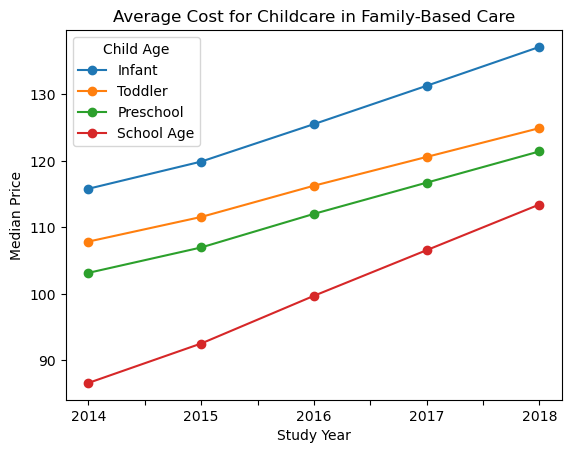

In [10]:
rq1_family['study_year'] = rq1_family['study_year'].astype(str)

# Plotting the data
ax = rq1_family.set_index('study_year').plot(kind='line', marker='o')

# Adding labels and title
plt.title('Average Cost for Childcare in Family-Based Care')
plt.xlabel('Study Year')
plt.ylabel('Median Price')

# Adding legend
ax.legend(['Infant', 'Toddler', 'Preschool', 'School Age'], title='Child Age')

# Displaying the plot
plt.show()

Based on the distribution of the Family childcare spending of North Carolina in the years 2014 to 2018, we are able to make two general observations. 
1. There was a general increase in the spendings for all three child stages in the year 2014 to 2018.
2. Between the Child stages, families spend the most on childcare when the child was an infant (0-23 months), then when the child was a toddler(24-35 months), and lastly they spent the least when the child was in preschool(36-54 months). 

In [11]:
# In NC, aggregated median price charge for Center-Based Childcare in the year 2014-2018
rq1_center = rq1.groupby('study_year')[['mc_infant', 'mc_toddler', 'mc_preschool', 'mcsa']].mean()
rq1_center = rq1_center.reset_index()
rq1_center

,study_year,mc_infant,mc_toddler,mc_preschool,mcsa
0,2014,162.734184,150.102653,147.063571,113.464388
1,2015,159.594800,147.730300,139.708600,107.789100
2,2016,162.246020,146.250714,133.198776,102.766633
3,2017,164.414184,144.325000,126.266429,97.418265
4,2018,166.582755,142.398469,119.332551,92.069694


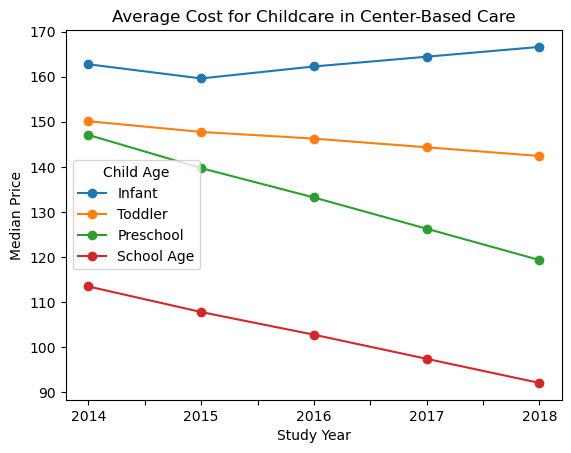

In [12]:
rq1_center['study_year'] = rq1_center['study_year'].astype(str)

# Plotting the data
ax = rq1_center.set_index('study_year').plot(kind='line', marker='o')

# Adding labels and title
plt.title('Average Cost for Childcare in Center-Based Care')
plt.xlabel('Study Year')
plt.ylabel('Median Price')

# Adding legend
ax.legend(['Infant', 'Toddler', 'Preschool', 'School Age'], title='Child Age')

# Displaying the plot
plt.show()

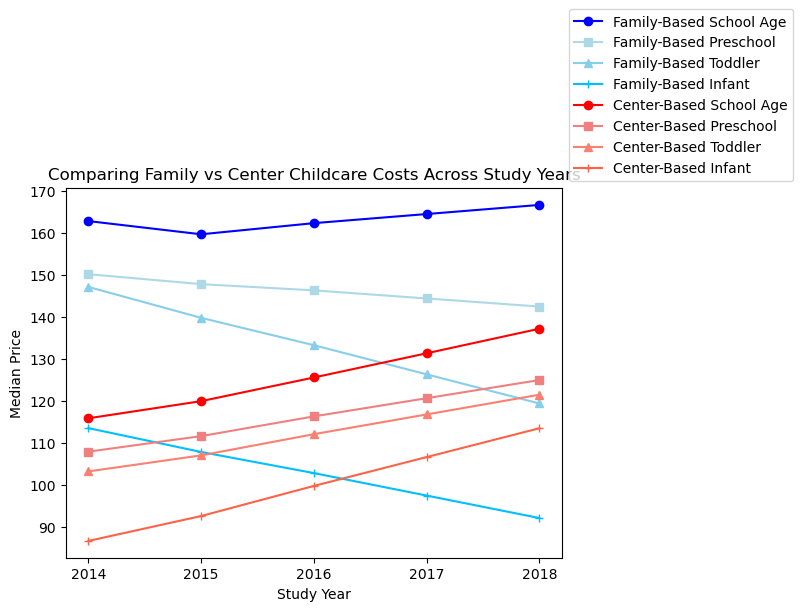

In [13]:
# Plotting specific columns from df1 (nc_year_grouped_center) in blue
plt.plot(rq1_center['study_year'], rq1_center['mc_infant'], label='mc_infant', color='blue', marker = 'o')
plt.plot(rq1_center['study_year'], rq1_center['mc_toddler'], label='mc_toddler', color='lightblue', marker = 's')
plt.plot(rq1_center['study_year'], rq1_center['mc_preschool'], label='mc_preschool', color='skyblue', marker = '^')
plt.plot(rq1_center['study_year'], rq1_center['mcsa'], label='mcsa', color='deepskyblue', marker = '+')

# Plotting specific columns from df2 (nc_year_grouped) in red
plt.plot(rq1_family['study_year'], rq1_family['mfcc_infant'], label='mfcc_infant', color='red', marker = 'o')
plt.plot(rq1_family['study_year'], rq1_family['mfcc_toddler'], label='mfcc_toddler', color='lightcoral', marker = 's')
plt.plot(rq1_family['study_year'], rq1_family['mfcc_preschool'], label='mfcc_preschool', color='salmon', marker = '^')
plt.plot(rq1_family['study_year'], rq1_family['mfccsa'], label='mfccsa', color='tomato', marker = '+')

# Adding labels and title
plt.title('Comparing Family vs Center Childcare Costs Across Study Years')
plt.xlabel('Study Year')
plt.ylabel('Median Price')
plt.legend(['Family-Based School Age', 'Family-Based Preschool', 'Family-Based Toddler', 'Family-Based Infant',
            'Center-Based School Age', 'Center-Based Preschool', 'Center-Based Toddler', 'Center-Based Infant'], loc = 'lower left', bbox_to_anchor=(1, 1))
# Display the plot
plt.show()

In [14]:
rq1.head()# Group by study_year and get the unique counties for each year
counties = rq1.groupby('study_year')['county_name'].count()
counties
#basically, includes almost all counties in the last four years. 

study_year
2014     98
2015    100
2016     98
2017     98
2018     98
Name: county_name, dtype: int64

**Hypothesis Test**

$H_0$: There is no difference between family vs center-based childcare costs for school-aged children in 2018.

$H_a$: There is some difference between family vs center-based childcare costs for school-aged children in 2018.

In [15]:
import scipy.stats as stats

# Example data (replace this with your actual data)
mask = rq1['study_year'] == 2018

family_costs_2018_sa = rq1[mask]['mcsa']
center_costs_2018_sa = rq1[mask]['mfccsa']


# Perform a two-sided t-test
p_value = stats.ttest_ind(family_costs_2018_sa, center_costs_2018_sa, equal_var = 'False')[1]

print(p_value)

2.6540842104035184e-14


P-Value Interpretation: Given that $H_0$ is true, or that there is no difference between family vs center-based childcare costs for school-aged children in 2018, the probability of observing an empirical mean at least as extreme as the one between family-based daycares and center-based daycares in 2018 is approximately 0 for a two-sided p-value, which is  statistically significant. Since the p-value is less than 0.05, we reject the null hypothesis. There is  sufficient evidence to conclude that family-based childcare costs differ from center-based childcare costs.



**Research Question**
2. What is the distribution of poverty rate/unemployment rate in North Carolina in the years 2014-2018? 

In [16]:
selected_columns = ['study_year','pr_f', 'pr_p','unr_16','county_name', 'state_name', 'state_abbreviation']
rq2 = nc_childcare[selected_columns]
rq2 = rq2.dropna(how = 'any')
rq2

,study_year,pr_f,pr_p,unr_16,county_name,state_name,state_abbreviation
20789,2008,13.2,16.6,5.71,Alamance County,North Carolina,NC
20790,2009,11.3,15.1,6.60,Alamance County,North Carolina,NC
20791,2010,12.1,16.3,8.35,Alamance County,North Carolina,NC
20792,2011,11.7,16.1,8.64,Alamance County,North Carolina,NC
20793,2012,12.3,17.3,9.38,Alamance County,North Carolina,NC
...,...,...,...,...,...,...,...
21884,2014,17.4,21.5,10.90,Yancey County,North Carolina,NC
21885,2015,17.1,21.7,11.01,Yancey County,North Carolina,NC
21886,2016,16.8,21.3,9.46,Yancey County,North Carolina,NC
21887,2017,16.2,19.6,8.34,Yancey County,North Carolina,NC


In [17]:
nc_year_grouped_ec = rq2.groupby('study_year')[['pr_f', 'pr_p', 'unr_16']].mean()
nc_year_grouped_ec = nc_year_grouped_ec.reset_index()
nc_year_grouped_ec




,study_year,pr_f,pr_p,unr_16
0,2008,12.5039,16.7042,7.2668
1,2009,12.8050,17.2390,8.2537
2,2010,13.0110,17.5820,9.3736
3,2011,13.3820,18.0930,10.5715
4,2012,13.8820,18.8480,11.4860
5,2013,14.4020,19.6230,12.1282
6,2014,14.6120,19.6910,11.6390
7,2015,14.2550,19.3700,10.4533
8,2016,13.9920,18.9890,9.3290
9,2017,13.4960,18.3220,7.9668


/var/folders/22/f10p69452_g_8k4c3c_f19s40000gn/T/ipykernel_75753/2615840656.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['study_year'] = df['study_year'].astype(str)


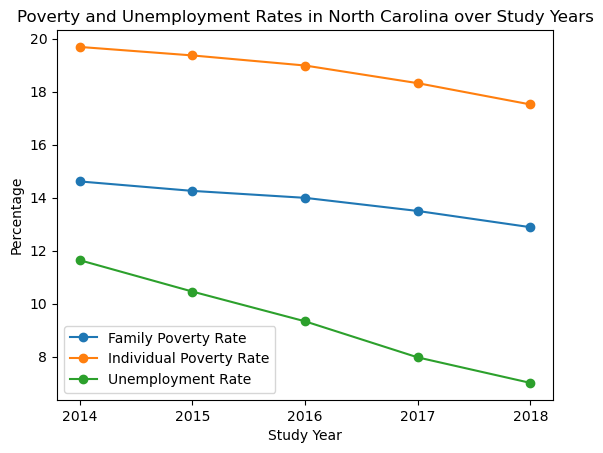

In [18]:
mask = nc_year_grouped_ec['study_year'] >= 2014
df = nc_year_grouped_ec[mask]
df['study_year'] = df['study_year'].astype(str)

# Plotting 'pr_f'
plt.plot(df['study_year'], df['pr_f'], label='pr_f', marker = 'o')

# Plotting 'pr_p'
plt.plot(df['study_year'], df['pr_p'], label='pr_p', marker = 'o')

# Plotting 'unr_16'
plt.plot(df['study_year'], df['unr_16'], label='unr_16', marker = 'o')

# Adding labels and title
plt.xlabel('Study Year')
plt.ylabel('Values')
plt.title('Line Graph for pr_f, pr_p, and unr_16')

# Adding legend
plt.legend(['Family Poverty Rate', "Individual Poverty Rate", 'Unemployment Rate'])
plt.ylabel('Percentage')
plt.title('Poverty and Unemployment Rates in North Carolina over Study Years')

# Display the plot
plt.show()

Based on the distribution of the Poverty/Unemployment Rate of North Carolina in the years 2014 to 2018, we are able to make two general observations.

1. There was a general decrease in the Poverty and the Unemployment rates in the year 2014 to 2018.
2. Between the different socioeconomic indicators, poverty rate for individuals was the highest, followed by the poverty rate for families. Lastly, the unemployment rate was the lowest. 

**Research Question 3**
What is the relationship between child care cost and average income in the year 2018 in North Carolina?

/Users/claudiarodriguez/miniconda3/envs/cs216/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/claudiarodriguez/miniconda3/envs/cs216/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


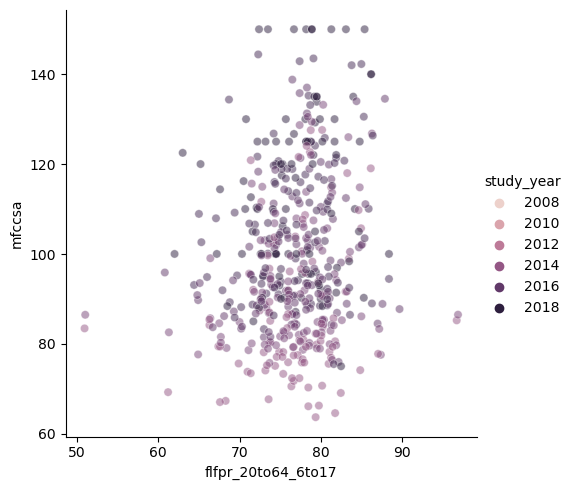

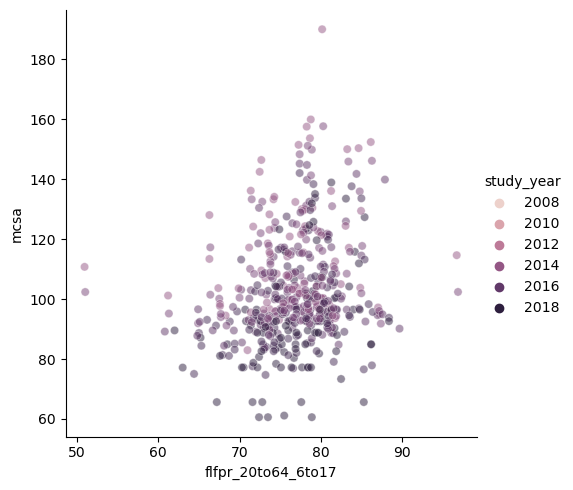

In [19]:
import seaborn as sns

sns.relplot(x='flfpr_20to64_6to17', y = 'mfccsa',data=nc_childcare, alpha=0.5, hue = 'study_year')
sns.relplot(x ='flfpr_20to64_6to17', y = 'mcsa', data=nc_childcare, alpha=0.5, hue = 'study_year')
# END SOLUTION

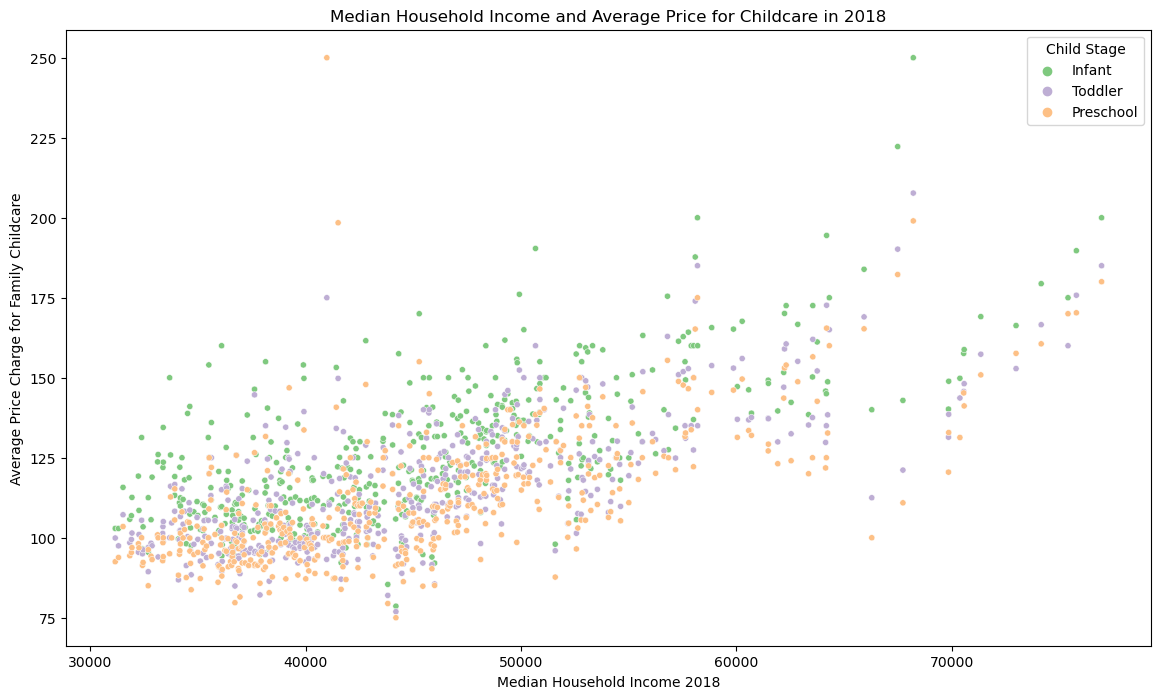

In [20]:
nc_year_grouped = nc_childcare.groupby('mhi_2018')[['mfcc_infant', 'mfcc_toddler', 'mfcc_preschool']].mean()
nc_year_grouped = nc_year_grouped.reset_index()
melted_data = pd.melt(nc_year_grouped, id_vars=['mhi_2018'], value_vars=['mfcc_infant', 'mfcc_toddler', 'mfcc_preschool'], var_name='Child Stage', value_name='Mean of Median Price Charge for Family Childcare')
plt.figure(figsize=(14, 8))
g3 = sns.scatterplot(x='mhi_2018', y="Mean of Median Price Charge for Family Childcare", hue="Child Stage",palette='Accent',data=melted_data,s=20)
plt.title('Median Household Income and Average Price for Childcare in 2018')
plt.xlabel('Median Household Income 2018')
plt.ylabel('Average Price Charge for Family Childcare')

new_labels = ['Infant', 'Toddler', 'Preschool']
g3.get_legend().set_title("Child Stage")
for t, l in zip(g3.get_legend().texts, new_labels):
    t.set_text(l)
    
plt.show()    

Based on the scatterplot of the relationship between child care cost and average income in the year 2018 in North Carolina, we are able to make two general observations.

1. There is a positive relationship between the median household income and average price charge for family childcare cost in 2018.
2. Between the different child stages, families spend the most on childcare when the child was an infant (0-23 months), then when the child was a toddler(24-35 months), and lastly they spent the least when the child was in preschool(36-54 months).

### Hypothesis Test

In [36]:
income_comparison = nc_childcare[['study_year', 'mcsa', 'mhi_2018']]
income_comparison = income_comparison[income_comparison['study_year']==2018]

In [50]:
# Creating new column for income status, going up by 15k to create 3 categories
income_comparison['income_status'] = pd.cut(income_comparison['mhi_2018'], bins=[31151.28,46000,61000,76956], labels=['Low', 'Middle', 'High'])
income_comparison['income_status'].dropna()
# Value counts
income_comparison['income_status'].value_counts()

income_status
Low       57
Middle    35
High       8
Name: count, dtype: int64

In [53]:
# Interval for low income, t test because relatively small sample size and we are not positive about the distribution
low_costs = income_comparison[income_comparison['income_status'] == 'Low']['mcsa']
n = len(low_costs)
mean = np.mean(low_costs)
std_error = np.std(low_costs, ddof=1) / np.sqrt(n)
low_interval = stats.t.interval(0.95, df=n-1, loc=mean, scale=std_error)

# Interval for middle income
middle_costs = income_comparison[income_comparison['income_status'] == 'Middle']['mcsa']
n = len(middle_costs)
mean = np.mean(middle_costs)
std_error = np.std(middle_costs, ddof=1) / np.sqrt(n)
middle_interval = stats.t.interval(0.95, df=n-1, loc=mean, scale=std_error)

# Interval for high income
high_costs = income_comparison[income_comparison['income_status'] == 'High']['mcsa']
n = len(high_costs)
mean = np.mean(high_costs)
std_error = np.std(high_costs, ddof=1) / np.sqrt(n)
high_interval = stats.t.interval(0.95, df=n-1, loc=mean, scale=std_error)

# Comparison
print("Low Income Interval:", low_interval)
print("Middle Income Interval:", middle_interval)
print("High Income Interval:", high_interval)

Low Income Interval: (81.95644132103453, 88.78105867896548)
Middle Income Interval: (93.14100440136308, 104.06756702720837)
High Income Interval: (87.41309468345113, 130.90940531654886)


# Linear regression models

In [ ]:
## only select 2018 for linear regression, prepare data for model by replacing NAs
nc_childcare_2018 = nc_childcare[nc_childcare["study_year"] == 2018]
nc_childcare_2018 = nc_childcare_2018.dropna(subset=["mcsa"])

### Predicting median childcare cost for schoolage children given median income, unemployment rate, and poverty rate:

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [ ]:
## this linear model is supposed to use the predictors in household_data to predict median childcare for schoolaged children

linear_model = LinearRegression()
# unemployment rate, poverty rate for families, median household income
household_data = nc_childcare_2018[["unr_16", "pr_f", "mhi_2018"]].values
# mcsa --> "Weekly, full-time median price charged for Center-Based Care for those who are school age based on the results reported in the market rate survey report for the county or the rate zone/cluster to which the county is assigned."
target = nc_childcare_2018["mcsa"].values
linear_model.fit(X = household_data, y = target)

nc_childcare_2018["predicted_childcare_cost_schoolage"] = linear_model.predict(household_data)

nc_childcare_2018["baseline"] = nc_childcare_2018["mcsa"].median()

mse = mean_squared_error(nc_childcare_2018["mcsa"].values, nc_childcare_2018["predicted_childcare_cost_schoolage"].values)
r2 = r2_score(nc_childcare_2018["mcsa"].values, nc_childcare_2018["predicted_childcare_cost_schoolage"].values)
mse_base = mean_squared_error(nc_childcare_2018["mcsa"].values, nc_childcare_2018["baseline"].values)
r2_base = r2_score(nc_childcare_2018["mcsa"].values, nc_childcare_2018["baseline"].values)

print("MSE model", mse, "R2 model", r2)
print("MSE baseline", mse_base, "R2 base", r2_base)

In [ ]:
## can conclude that including median household income does improve the accuracy of the model

## this linear model is supposed to use the predictors in household_data to predict median childcare for schoolaged children

linear_model = LinearRegression()
# unemployment rate, poverty rate for families, median household income
household_data = nc_childcare_2018[["unr_16", "pr_f"]].values
# mcsa --> "Weekly, full-time median price charged for Center-Based Care for those who are school age based on the results reported in the market rate survey report for the county or the rate zone/cluster to which the county is assigned."
target = nc_childcare_2018["mcsa"].values
linear_model.fit(X = household_data, y = target)

nc_childcare_2018["predicted_childcare_cost_schoolage"] = linear_model.predict(household_data)

nc_childcare_2018["baseline"] = nc_childcare_2018["mcsa"].median()

mse = mean_squared_error(nc_childcare_2018["mcsa"].values, nc_childcare_2018["predicted_childcare_cost_schoolage"].values)
r2 = r2_score(nc_childcare_2018["mcsa"].values, nc_childcare_2018["predicted_childcare_cost_schoolage"].values)
mse_base = mean_squared_error(nc_childcare_2018["mcsa"].values, nc_childcare_2018["baseline"].values)
r2_base = r2_score(nc_childcare_2018["mcsa"].values, nc_childcare_2018["baseline"].values)
print("*mse and r2 for model WITHOUT median household income*")
print("MSE model,", mse, "R2 model", r2)

#### Conclusions from model:

Our first model appears to explain about 26.82% of the variability in our data, with a MSE of 212.17. **good or bad??**. We next removed the "mhi_2018" variable, which represents median household income, as a predictor in our model. This yielded a lower R^2 of about 0.1260, or 12.60%, and a higher MSE of 254.07. Thus, including median household income as a predictor of median household income improved our model.

### Predicting median childcare cost for schoolage children given number of household, county percentage hispanic, and median household income

In [ ]:
## this linear model is supposed to use the predictors in household_data to predict median childcare for schoolaged children

linear_model = LinearRegression()
# unemployment rate, poverty rate for families, median household income
household_data = nc_childcare_2018[["hispanic", "mhi_2018", "households"]].values
# mcsa --> "Weekly, full-time median price charged for Center-Based Care for those who are school age based on the results reported in the market rate survey report for the county or the rate zone/cluster to which the county is assigned."
target = nc_childcare_2018["mcsa"].values
linear_model.fit(X = household_data, y = target)

nc_childcare_2018["predicted_childcare_cost_byhispanic"] = linear_model.predict(household_data)

nc_childcare_2018["baseline"] = nc_childcare_2018["mcsa"].median()

mse = mean_squared_error(nc_childcare_2018["mcsa"].values, nc_childcare_2018["predicted_childcare_cost_byhispanic"].values)
r2 = r2_score(nc_childcare_2018["mcsa"].values, nc_childcare_2018["predicted_childcare_cost_byhispanic"].values)
mse_base = mean_squared_error(nc_childcare_2018["mcsa"].values, nc_childcare_2018["baseline"].values)
r2_base = r2_score(nc_childcare_2018["mcsa"].values, nc_childcare_2018["baseline"].values)

print("MSE model", mse, "R2 model", r2)
print("MSE baseline", mse_base, "R2 base", r2_base)

In [ ]:
linear_model = LinearRegression()
# unemployment rate, poverty rate for families, median household income
household_data = nc_childcare_2018[["mhi_2018", "households"]].values
# mcsa --> "Weekly, full-time median price charged for Center-Based Care for those who are school age based on the results reported in the market rate survey report for the county or the rate zone/cluster to which the county is assigned."
target = nc_childcare_2018["mcsa"].values
linear_model.fit(X = household_data, y = target)

nc_childcare_2018["predicted_childcare_cost_byhispanic"] = linear_model.predict(household_data)

nc_childcare_2018["baseline"] = nc_childcare_2018["mcsa"].median()

mse = mean_squared_error(nc_childcare_2018["mcsa"].values, nc_childcare_2018["predicted_childcare_cost_byhispanic"].values)
r2 = r2_score(nc_childcare_2018["mcsa"].values, nc_childcare_2018["predicted_childcare_cost_byhispanic"].values)

print("*MSE and R2 without hispanic predictor*")
print("MSE model", mse, "R2 model", r2)

#### Conclusions from model:

Our first model appears to explain about 32.77% of the variability in our data, with a MSE of 195.42. **good or bad??**. We next removed the "hispanic" variable, which median household income, as a predictor in our model. This yielded a lower R^2 of about 0.1260, or 12.60%, and a higher MSE of 254.07. Thus, including median household income as a predictor of median household income improved our model.